In [1]:
library(tidyverse)
library(caret)
library(rpart)

Warning message:
"package 'tidyverse' was built under R version 3.6.3"-- Attaching packages --------------------------------------- tidyverse 1.3.0 --
v ggplot2 3.2.1     v purrr   0.3.3
v tibble  2.1.3     v dplyr   0.8.3
v tidyr   1.0.0     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
Warning message:
"package 'ggplot2' was built under R version 3.6.2"Warning message:
"package 'tibble' was built under R version 3.6.2"Warning message:
"package 'tidyr' was built under R version 3.6.2"Warning message:
"package 'readr' was built under R version 3.6.2"Warning message:
"package 'purrr' was built under R version 3.6.2"Warning message:
"package 'dplyr' was built under R version 3.6.2"Warning message:
"package 'stringr' was built under R version 3.6.2"Warning message:
"package 'forcats' was built under R version 3.6.2"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Warning mess

In [2]:
titanic_train <- read_csv("./data/train.csv")
titanic_test <- read_csv("./data/test.csv")

Parsed with column specification:
cols(
  PassengerId = col_double(),
  Survived = col_double(),
  Pclass = col_double(),
  Name = col_character(),
  Sex = col_character(),
  Age = col_double(),
  SibSp = col_double(),
  Parch = col_double(),
  Ticket = col_character(),
  Fare = col_double(),
  Cabin = col_character(),
  Embarked = col_character()
)
Parsed with column specification:
cols(
  PassengerId = col_double(),
  Pclass = col_double(),
  Name = col_character(),
  Sex = col_character(),
  Age = col_double(),
  SibSp = col_double(),
  Parch = col_double(),
  Ticket = col_character(),
  Fare = col_double(),
  Cabin = col_character(),
  Embarked = col_character()
)


In [3]:
str(titanic_train)

Classes 'spec_tbl_df', 'tbl_df', 'tbl' and 'data.frame':	891 obs. of  12 variables:
 $ PassengerId: num  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : num  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : num  3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : chr  "Braund, Mr. Owen Harris" "Cumings, Mrs. John Bradley (Florence Briggs Thayer)" "Heikkinen, Miss. Laina" "Futrelle, Mrs. Jacques Heath (Lily May Peel)" ...
 $ Sex        : chr  "male" "female" "female" "female" ...
 $ Age        : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : num  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : num  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : chr  "A/5 21171" "PC 17599" "STON/O2. 3101282" "113803" ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : chr  NA "C85" NA "C123" ...
 $ Embarked   : chr  "S" "C" "S" "S" ...
 - attr(*, "spec")=
  .. cols(
  ..   PassengerId = col_double(),
  ..   Survived = col_double(),
  ..   Pclass = col_double(),
  ..   Name = col_character(),
  ..   Sex = col_character(),

In [4]:
str(titanic_test)

Classes 'spec_tbl_df', 'tbl_df', 'tbl' and 'data.frame':	418 obs. of  11 variables:
 $ PassengerId: num  892 893 894 895 896 897 898 899 900 901 ...
 $ Pclass     : num  3 3 2 3 3 3 3 2 3 3 ...
 $ Name       : chr  "Kelly, Mr. James" "Wilkes, Mrs. James (Ellen Needs)" "Myles, Mr. Thomas Francis" "Wirz, Mr. Albert" ...
 $ Sex        : chr  "male" "female" "male" "male" ...
 $ Age        : num  34.5 47 62 27 22 14 30 26 18 21 ...
 $ SibSp      : num  0 1 0 0 1 0 0 1 0 2 ...
 $ Parch      : num  0 0 0 0 1 0 0 1 0 0 ...
 $ Ticket     : chr  "330911" "363272" "240276" "315154" ...
 $ Fare       : num  7.83 7 9.69 8.66 12.29 ...
 $ Cabin      : chr  NA NA NA NA ...
 $ Embarked   : chr  "Q" "S" "Q" "S" ...
 - attr(*, "spec")=
  .. cols(
  ..   PassengerId = col_double(),
  ..   Pclass = col_double(),
  ..   Name = col_character(),
  ..   Sex = col_character(),
  ..   Age = col_double(),
  ..   SibSp = col_double(),
  ..   Parch = col_double(),
  ..   Ticket = col_character(),
  ..   Fare = co

### Check for any NAs

In [5]:
#which of the columns have NA
na_col_train <- apply(titanic_train, 2, function(x){
            any(is.na(x))
})
na_col_train

PassengerId    Survived      Pclass        Name         Sex         Age 
      FALSE       FALSE       FALSE       FALSE       FALSE        TRUE 
      SibSp       Parch      Ticket        Fare       Cabin    Embarked 
      FALSE       FALSE       FALSE       FALSE        TRUE        TRUE

In [6]:
#indices of NA entities
na_matrix_train <- apply(titanic_train, 2, function(x){
            is.na(x)
})
na_tib_train <- na_matrix_train %>% as_tibble()
na_Age_ind_train <- which(na_tib_train$Age == TRUE)
na_Cabin_ind_train <- which(na_tib_train$Cabin == TRUE)
na_Embarked_ind_train <- which (na_tib_train$Embarked == TRUE)

In [7]:
length(na_Age_ind_train)

[1] 177

In [8]:
length(na_Cabin_ind_train)

[1] 687

In [9]:
length(na_Embarked_ind_train)

[1] 2

In [10]:
#which of the columns have NA
na_col_test <- apply(titanic_test, 2, function(x){
            any(is.na(x))
})
na_col_test

PassengerId      Pclass        Name         Sex         Age       SibSp 
      FALSE       FALSE       FALSE       FALSE        TRUE       FALSE 
      Parch      Ticket        Fare       Cabin    Embarked 
      FALSE       FALSE        TRUE        TRUE       FALSE

In [11]:
#indices of NA entities
na_matrix_test <- apply(titanic_test, 2, function(x){
            is.na(x)
})
na_tib_test <- na_matrix_test %>% as_tibble()
na_Age_ind_test <- which(na_tib_test$Age == TRUE)
na_Fare_ind_test <- which(na_tib_test$Fare == TRUE)
na_Cabin_ind_test <- which(na_tib_test$Cabin == TRUE)

In [12]:
length(na_Age_ind_test)

[1] 86

In [13]:
length(na_Fare_ind_test)

[1] 1

In [14]:
length(na_Cabin_ind_test)

[1] 327

### Handle missing values

In [15]:
titanic_train$Age[na_Age_ind_train] <- titanic_train %>% filter(!is.na(Age)) %>%
    pull(Age) %>% median()

In [16]:
sum(is.na(titanic_train$Age))

[1] 0

In [17]:
titanic_train %>% .$Embarked %>% as_factor() %>% summary()

S    C    Q NA's 
 644  168   77    2

In [18]:
titanic_train$Embarked[na_Embarked_ind_train] <- "S" 

In [19]:
titanic_test$Age[na_Age_ind_test] <- titanic_test %>% filter(!is.na(Age)) %>%
    pull(Age) %>% median()

In [20]:
titanic_test$Fare[na_Fare_ind_test] <- titanic_test %>% filter(!is.na(Fare)) %>%
    pull(Fare) %>% median()

### Check how many percentages of females and males survived

In [21]:
titanic_train %>% group_by(Sex) %>% summarize(mean(Survived))

Sex,mean(Survived)
female,0.7420382
male,0.1889081


### Gender model

In [22]:
y_hat_gender <- ifelse(titanic_test$Sex == "female", 1, 0)
pred_gender <- tibble(PassengerId = titanic_test$PassengerId,
                     Survived = y_hat_gender)
write_csv(pred_gender, "./csv_files/pred_gender.csv")

Gender model would score 0.76555

### Factorize train and test sets

In [23]:
titanic_train_factorized <- titanic_train %>% mutate(Survived = factor(Survived),
                                               Pclass = factor(Pclass),
                                               Sex = factor(Sex),
                                               Embarked = factor(Embarked)) %>%
                            select(Survived, Sex, Pclass, Age, SibSp, Parch, Fare, Embarked)

In [24]:
titanic_test_factorized <- titanic_test %>% mutate(Pclass = factor(Pclass),
                                               Sex = factor(Sex),
                                               Embarked = factor(Embarked)) %>%
                            select(Sex, Pclass, Age, SibSp, Parch, Fare, Embarked)

### Feature engineering and transformation

In [25]:
# adding a new feature that is family size
titanic_train_factorized <- titanic_train_factorized %>% mutate(FamilySize = SibSp + Parch)
titanic_test_factorized <- titanic_test_factorized %>% mutate(FamilySize = SibSp + Parch)

In [26]:
normalize <- function(x){
    (x - min(x)) / (max(x) - min(x))
}

In [27]:
titanic_train_factorized <- titanic_train_factorized %>% mutate(Age = normalize(Age), Fare = normalize(Fare),
                                                               SibSp = normalize(SibSp), Parch = normalize(Parch),
                                                               FamilySize = normalize(FamilySize))
titanic_test_factorized <- titanic_test_factorized %>% mutate(Age = normalize(Age), Fare = normalize(Fare),
                                                               SibSp = normalize(SibSp), Parch = normalize(Parch),
                                                               FamilySize = normalize(FamilySize))

### Neural Networks with nnet (single hidden layer)

In [ ]:
fit_nnet <- train(Survived ~ ., method = "nnet", data = titanic_train_factorized,
                 tuneGrid = expand.grid(size = seq(from = 1, to = 10, by = 1),
                        decay = seq(from = 0.1, to = 0.7, by = 0.1)),
                 trControl = trainControl(method="repeatedcv", number=10, repeats = 3))

In [29]:
fit_nnet

Neural Network 

891 samples
  8 predictor
  2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 802, 802, 801, 802, 802, 802, ... 
Resampling results across tuning parameters:

  size  decay  Accuracy   Kappa    
   1    0.1    0.8039564  0.5654672
   1    0.2    0.8039439  0.5655033
   1    0.3    0.8069445  0.5719451
   1    0.4    0.8061998  0.5695451
   1    0.5    0.8065911  0.5698286
   1    0.6    0.8069530  0.5704773
   1    0.7    0.8069573  0.5699248
   2    0.1    0.8084639  0.5773791
   2    0.2    0.8088048  0.5781577
   2    0.3    0.8102987  0.5807675
   2    0.4    0.8084386  0.5760029
   2    0.5    0.8050804  0.5684560
   2    0.6    0.8065869  0.5713781
   2    0.7    0.8069531  0.5720763
   3    0.1    0.8107110  0.5804991
   3    0.2    0.8054674  0.5692199
   3    0.3    0.8076978  0.5754881
   3    0.4    0.8091835  0.5786954
   3    0.5    0.8073234  0.5738383
   3    0.6    0.8065869  0.5717

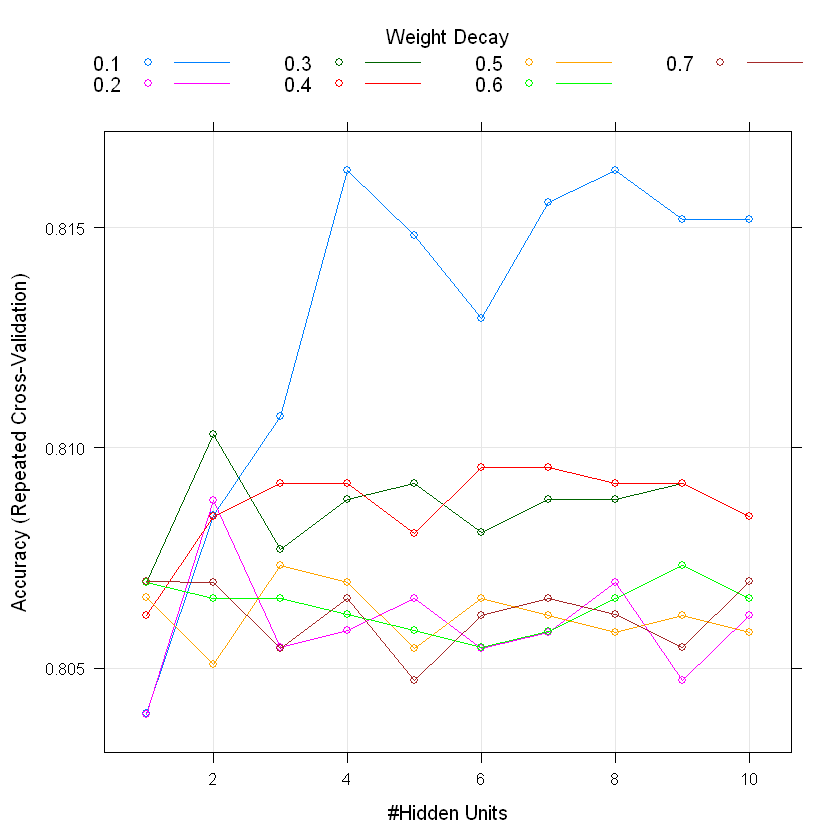

In [31]:
plot(fit_nnet)

In [65]:
y_hat_nnet <- predict(fit_nnet, titanic_test_factorized)
pred_nnet <- tibble(PassengerId = titanic_test$PassengerId,
                    Survived = as.character(y_hat_nnet))
write_csv(pred_nnet, "./csv_files/pred_nnet.csv")

nnet scored 0.76076

### knn

In [33]:
fit_knn <- train(Survived ~ ., method = "knn", data = titanic_train_factorized,
                tuneGrid = data.frame(k = seq(3, 33, 2)),
                trControl = trainControl(method="repeatedcv", number=10, repeats = 5))

In [34]:
fit_knn

k-Nearest Neighbors 

891 samples
  8 predictor
  2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 802, 802, 801, 802, 803, 802, ... 
Resampling results across tuning parameters:

  k   Accuracy   Kappa    
   3  0.8013192  0.5743939
   5  0.8029023  0.5761608
   7  0.8022157  0.5703644
   9  0.7990870  0.5598311
  11  0.8004556  0.5621124
  13  0.7970719  0.5509426
  15  0.8009024  0.5578584
  17  0.8020185  0.5597793
  19  0.8058162  0.5662732
  21  0.8064880  0.5663234
  23  0.8085053  0.5704448
  25  0.8102880  0.5736105
  27  0.8098488  0.5715292
  29  0.8075965  0.5656689
  31  0.8037886  0.5553550
  33  0.8024527  0.5520559

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 25.

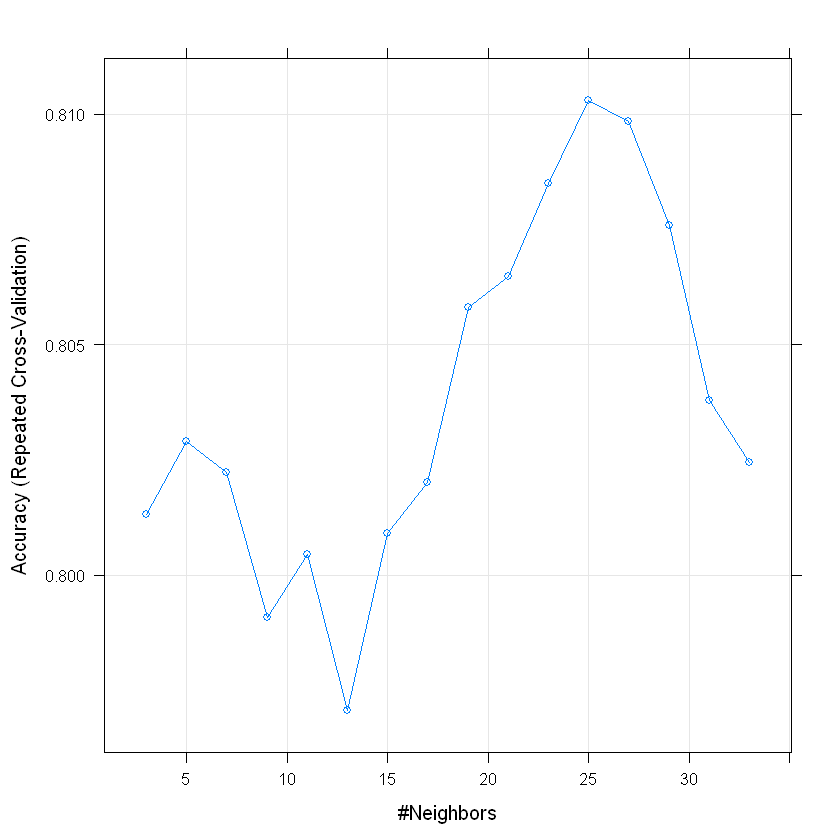

In [35]:
plot(fit_knn)

In [66]:
y_hat_knn <- predict(fit_knn, titanic_test_factorized)
pred_knn <- tibble(PassengerId = titanic_test$PassengerId,
                    Survived = as.character(y_hat_knn))
write_csv(pred_knn, "./csv_files/pred_knn.csv")

### Logistic regression with glm

In [37]:
fit_logit <- train(Survived ~ Sex + Fare + Pclass + FamilySize + Age, method = "glm", 
                data = titanic_train_factorized, family = "binomial")
                #trControl = trainControl(method="repeatedcv", number=8, repeats = 5))

In [38]:
fit_logit

Generalized Linear Model 

891 samples
  5 predictor
  2 classes: '0', '1' 

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 891, 891, 891, 891, 891, 891, ... 
Resampling results:

  Accuracy   Kappa    
  0.7989578  0.5703138


In [68]:
y_hat_logit <- predict(fit_logit, titanic_test_factorized)
pred_logit <- tibble(PassengerId = titanic_test$PassengerId,
                    Survived = as.character(y_hat_logit))
write_csv(pred_logit, "./csv_files/pred_logit.csv")

logit submission scored 0.75598

### Decision Tree with rpart

In [40]:
fit_rpart <- train(Survived ~ ., method = "rpart", tuneGrid = data.frame(cp = seq(0, 0.02, 0.001)),
                data = titanic_train_factorized,
                trControl = trainControl(method="repeatedcv", number=8, repeats = 5))

In [41]:
fit_rpart$bestTune

,cp
3,0.002


In [42]:
fit_rpart

CART 

891 samples
  8 predictor
  2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (8 fold, repeated 5 times) 
Summary of sample sizes: 780, 779, 779, 781, 779, 780, ... 
Resampling results across tuning parameters:

  cp     Accuracy   Kappa    
  0.000  0.8226986  0.6200541
  0.001  0.8238187  0.6222631
  0.002  0.8247056  0.6231187
  0.003  0.8231370  0.6189674
  0.004  0.8206696  0.6111819
  0.005  0.8168567  0.6016958
  0.006  0.8168648  0.6003781
  0.007  0.8125915  0.5904131
  0.008  0.8125915  0.5903251
  0.009  0.8139409  0.5932064
  0.010  0.8123561  0.5895487
  0.011  0.8107956  0.5863883
  0.012  0.8103452  0.5861470
  0.013  0.8103452  0.5861470
  0.014  0.8096776  0.5853399
  0.015  0.8096776  0.5853399
  0.016  0.8081050  0.5815055
  0.017  0.8065224  0.5777747
  0.018  0.8065224  0.5777747
  0.019  0.8069769  0.5788455
  0.020  0.8076526  0.5811750

Accuracy was used to select the optimal model using the largest value.
The final value used for the mo

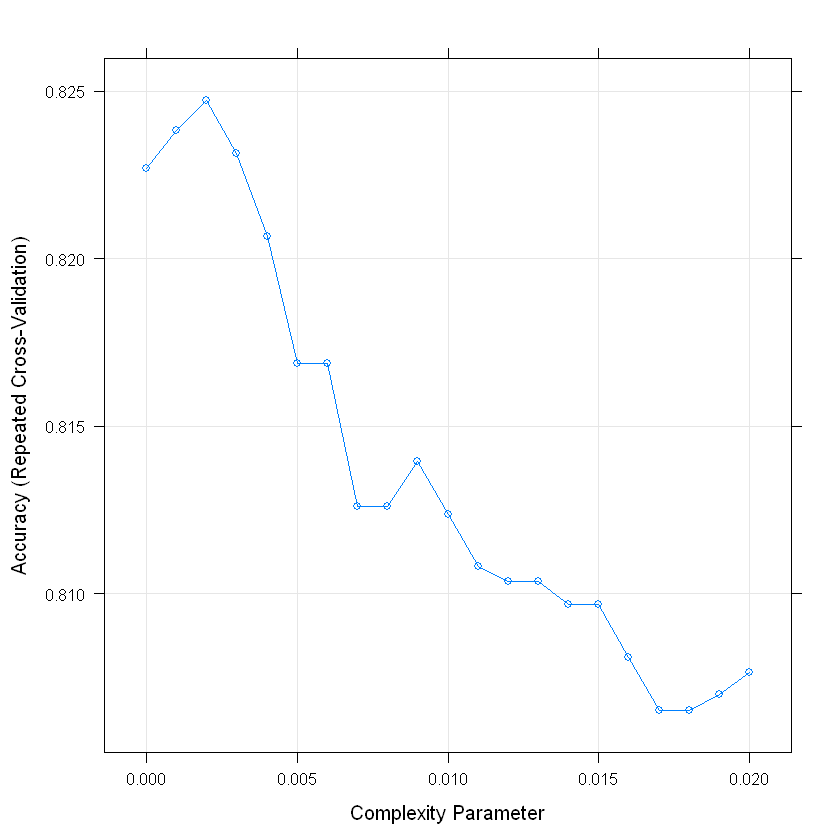

In [43]:
plot(fit_rpart)

In [67]:
y_hat_rpart <- predict(fit_rpart, titanic_test_factorized)
pred_rpart <- tibble(PassengerId = titanic_test$PassengerId,
                    Survived = as.character(y_hat_rpart))
write_csv(pred_rpart, "./csv_files/pred_rpart.csv")

In [45]:
varImp(fit_rpart)

rpart variable importance

           Overall
Sexmale    100.000
Fare        88.741
Pclass3     73.369
FamilySize  50.458
Age         34.500
SibSp       22.385
Pclass2     10.027
EmbarkedS    7.571
Parch        5.154
EmbarkedQ    0.000

In [46]:
nrow(pred_rpart)

[1] 418

rpart submission scored 0.77511

### Random Forest

In [76]:
fit_rf <- train(Survived ~ Sex + Pclass + Age + Fare + FamilySize, method = "rf", data = titanic_train_factorized,
               ntree = 1000, tuneGrid = data.frame(mtry = seq(2, 5, 1)),
               trControl = trainControl(method="repeatedcv", number=8, repeats = 5))
fit_rf$bestTune

,mtry
2,3


In [77]:
fit_rf

Random Forest 

891 samples
  5 predictor
  2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (8 fold, repeated 5 times) 
Summary of sample sizes: 779, 780, 780, 779, 780, 779, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
  2     0.8282813  0.6249239
  3     0.8327597  0.6386596
  4     0.8262381  0.6273996
  5     0.8228739  0.6211299

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 3.

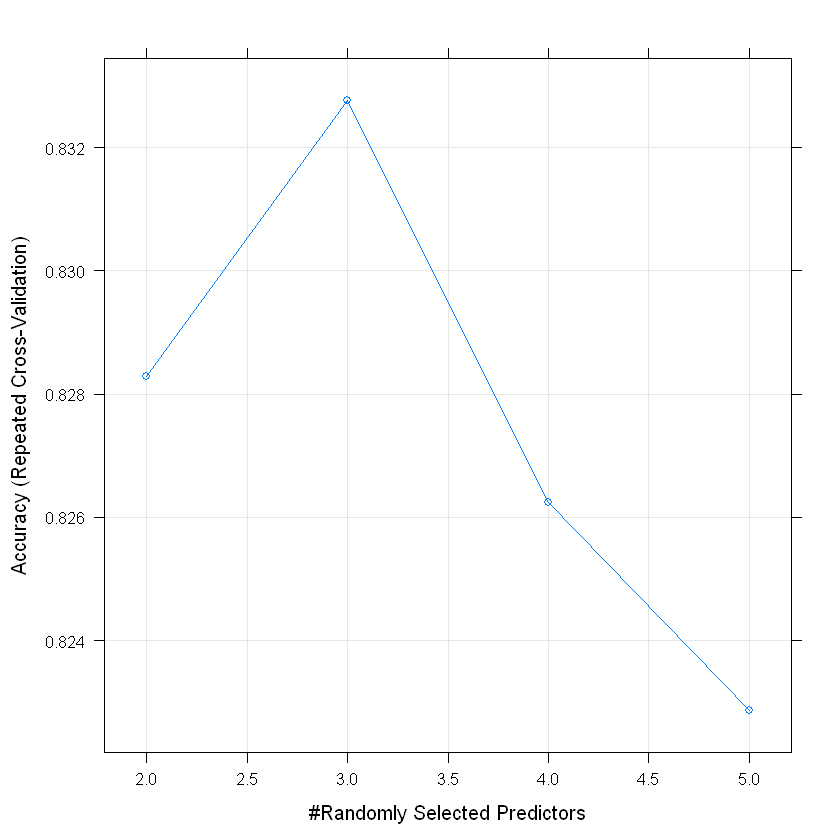

In [78]:
plot(fit_rf)

In [79]:
y_hat_rf <- predict(fit_rf, titanic_test_factorized)
pred_rf <- tibble(PassengerId = titanic_test$PassengerId,
                 Survived = as.character(y_hat_rf))
write_csv(pred_rf, "./csv_files/pred_rf.csv")

In [80]:
varImp(fit_rf)

rf variable importance

           Overall
Sexmale     100.00
Fare         75.68
Age          65.63
Pclass3      22.45
FamilySize   19.96
Pclass2       0.00

rf submission scored 0.78468

### SVM with linear kernel

In [52]:
fit_svm <- train(Survived ~ ., method = "svmLinear", data = titanic_train_factorized,
                 preProcess = c("center","scale"),
                 tuneGrid = expand.grid(C = seq(0.01, 2, length = 10)),
                 trControl = trainControl(method="repeatedcv", number=8, repeats = 5))

In [53]:
fit_svm

Support Vector Machines with Linear Kernel 

891 samples
  8 predictor
  2 classes: '0', '1' 

Pre-processing: centered (10), scaled (10) 
Resampling: Cross-Validated (8 fold, repeated 5 times) 
Summary of sample sizes: 780, 779, 780, 780, 779, 779, ... 
Resampling results across tuning parameters:

  C          Accuracy   Kappa    
  0.0100000  0.7867630  0.5419456
  0.2311111  0.7867610  0.5418379
  0.4522222  0.7865358  0.5414005
  0.6733333  0.7865358  0.5414005
  0.8944444  0.7865358  0.5414005
  1.1155556  0.7865358  0.5414005
  1.3366667  0.7863106  0.5409677
  1.5577778  0.7863106  0.5409677
  1.7788889  0.7863106  0.5409677
  2.0000000  0.7863106  0.5409677

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was C = 0.01.

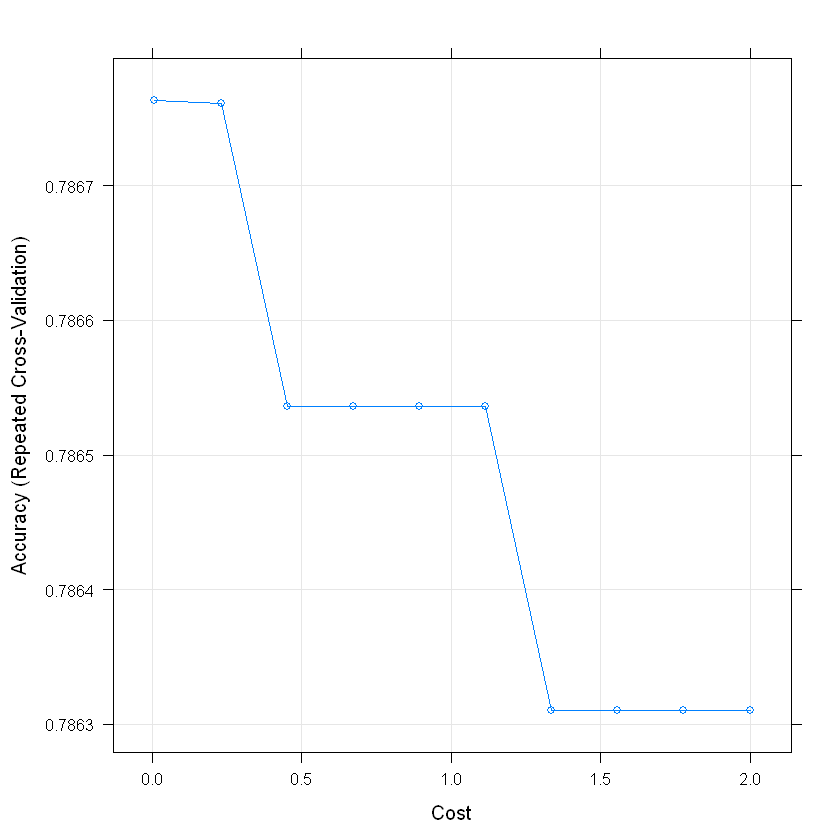

In [89]:
plot(fit_svm)

In [54]:
y_hat_svm <- predict(fit_svm, titanic_test_factorized)
pred_svm <- tibble(PassengerID = titanic_test$PassengerId,
                  Survived = as.character(y_hat_svm))
write_csv(pred_svm, "./csv_files/pred_svm.csv")

In [55]:
str(y_hat_svm)

 Factor w/ 2 levels "0","1": 1 2 1 1 2 1 2 1 2 1 ...


In [56]:
str(pred_svm$Survived)

 chr [1:418] "0" "1" "0" "0" "1" "0" "1" "0" "1" "0" "0" "0" "1" "0" "1" ...


SVM scored 0.76555



### Ensembles with select models

In [95]:
models <- c("pred_rf", "pred_nnet", "pred_rpart", "pred_knn", "pred_svm")
# excluding worst-performing logit model and gender model

In [82]:
length(pred_rf$Survived)

[1] 418

In [96]:
preds <- sapply(models, function(model){
    x = paste0(model, "$Survived")
    eval(parse(text = x))
})

In [97]:
dim(preds)

[1] 418   5

In [98]:
head(preds, 20)

pred_rf,pred_nnet,pred_rpart,pred_knn,pred_svm
0,0,0,0,0
0,0,0,0,1
0,0,0,0,0
0,0,0,0,0
1,0,1,0,1
0,0,0,0,0
0,1,1,1,1
0,0,0,0,0
1,1,1,1,1
0,0,0,0,0


In [99]:
votes <- rowMeans(preds == "1")
y_hat_ensembles <- ifelse(votes > 0.5, "1", "0")

In [100]:
str(y_hat_ensembles)

 chr [1:418] "0" "0" "0" "0" "1" "0" "1" "0" "1" "0" "0" "0" "1" "0" "1" ...


In [101]:
pred_ensembles <- tibble(PassengerID = titanic_test$PassengerId,
                  Survived = y_hat_ensembles)
write_csv(pred_ensembles, "./csv_files/pred_ensembles.csv")

ensembles scored 0.78947